<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;"> </center>

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [2]:
# Что избежать отображение предупреждений об использовании sqlalchemy 
import warnings
warnings.filterwarnings("ignore")

In [1522]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
#Удалил перед отправкой на github

In [ ]:
# не уверен, как вы организовали хранение скрытой информации
# предлагаю использовать dotenv, для этого
# в корневой папке с проектом создаём файл .env туда переносим 5 переменных
# во кладке source control добавляем .env файл в gitignore
# теперь можно подгрузить переменные, явным образом не показывая их в коде

import os
from dotenv import load_dotenv

load_dotenv()
DBNAME = os.getenv("DBNAME")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
HOST = os.getenv("HOST")
PORT = os.getenv("PORT")

In [10]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [11]:
# текст запроса

#Считаем общее количество вакансий в базе данных
query_3_1 = f'''SELECT COUNT(*)
                FROM public.vacancies
            '''

In [12]:
# результат запроса

#Выводим результат запроса
df_query_3_1 = pd.read_sql_query(query_3_1, connection)
display(df_query_3_1)

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [20]:
# текст запроса

#Считаем общее количество работадателей в базе данных
query_3_2 = f'''SELECT COUNT(*)
                FROM public.employers
            '''

In [21]:
# результат запроса

#Выводим результат запроса
df_query_3_2 = pd.read_sql_query(query_3_2, connection)
display(df_query_3_2)

,count
0,23501


In [22]:
# Это не ошибка и не требование, просто хочу показать пример использования f-string
print(f'Число уникальных id вакансий: {df_query_3_2.squeeze()}')

Число уникальных id вакансий: 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [15]:
# текст запроса

#Считаем общее количество регионов в базе данных
query_3_3 = f'''SELECT COUNT(*)
                FROM public.areas
            '''

In [16]:
# результат запроса

#Выводим результат запроса
df_query_3_3 = pd.read_sql_query(query_3_3, connection)
display(df_query_3_3)

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [17]:
# текст запроса

#Считаем общее количество сфер деятельности в базе данных
query_3_4 = f'''SELECT COUNT(*)
                FROM public.industries
            '''

In [18]:
# результат запроса

#Выводим результат запроса
df_query_3_4 = pd.read_sql_query(query_3_4, connection)
display(df_query_3_4)

,count
0,294


***

### Выводы по предварительному анализу
По предварительному анализу, как по мне нельзя сделать конкретных выводов. Можно лишь получить информацию о количестве вакансий, работодателей, регионов и сфер деятельности. 

Видно, что количество работодателей **(23501)** примерно вдвое меньше количества вакансий **(49197)**. Это может означать, что некоторые работодатели выложили несколько вакансий. Также это не исключает, что у работодателя может не быть вакансий вовсе.

По количеству регионов **(1362)** видно, что работодатели находятся по всей стране, а не сосредоточенны в конкретных городах. Также работодатели находятся и вне нашей страны, например в Белоруси.

Также видно, что имеется немалое количество сфер деятельности **(294)**.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [23]:
# текст запроса

#Ищем топ 5 регионов по количеству вакансий в них
n = 5
query_4_1 = f''' SELECT a.name,
                 COUNT(v.id)
                 FROM public.vacancies v 
                 JOIN public.areas a ON v.area_id = a.id
                 GROUP BY a.name
                 ORDER BY 2 DESC
                 LIMIT({n})
            '''

In [24]:
# результат запроса

#Выводим результат запроса
query_4_1 = pd.read_sql_query(query_4_1, connection)
display(query_4_1)

,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [25]:
# текст запроса

#Считаем количество вакансий с 
#заполненной хотя бы одной из двух полей с зарплатой
query_4_2 = f'''SELECT COUNT(id)
                FROM public.vacancies 
                WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
            '''

In [26]:
# результат запроса

#Выводим результат запроса
query_4_2 = pd.read_sql_query(query_4_2, connection)
display(query_4_2)

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [27]:
# текст запроса

#Ищем средние значения для нижней и верхней границы зарплатной вилки
#Значения округляем до целого значения
query_4_3 = f'''SELECT ROUND(AVG(salary_from)) salary_from,
                ROUND(AVG(salary_to)) salary_to
                FROM public.vacancies
            '''

In [28]:
# результат запроса

#Выводим результат запроса
query_4_3 = pd.read_sql_query(query_4_3, connection)
display(query_4_3)

,salary_from,salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [29]:
# текст запроса

#Ищем количество вакансий каждого сочетания schedule и employment
query_4_4 = f'''SELECT 
                        DISTINCT 
                                schedule, 
                                employment,
                                COUNT(*) cnt
                FROM public.vacancies
                GROUP BY schedule, employment
                ORDER BY cnt DESC
'''

In [30]:
# результат запроса

#Выводим результат запроса
query_4_4 = pd.read_sql_query(query_4_4, connection)
display(query_4_4)

#Ответ на вопрос задания 4.4
schedule = query_4_4['schedule'][1]
employment = query_4_4['employment'][1]
cnt = query_4_4['cnt'][1]
display(f'На втором месте по пополярности находится пара {schedule} - {employment} с количеством вакансий {cnt}')

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


'На втором месте по пополярности находится пара Удаленная работа - Полная занятость с количеством вакансий 7802'

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [31]:
# текст запроса

#Ищем количество вакансий для experience
query_4_5 = f'''SELECT experience,
                COUNT(*) cnt
                FROM public.vacancies
                GROUP BY experience
                ORDER BY cnt
'''

In [32]:
# результат запроса

#Выводим результат запроса
query_4_5 = pd.read_sql_query(query_4_5, connection)
display(query_4_5)

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### Выводы по детальному анализу вакансий

В ходе детального анализа вакансий были получены следующие данные:

1. Количество вакансий в каждом регионе. Выведены топ 5 регионов **(Москва, Санкт-Петербург, Минск, Новосибирск, Алматы)**.
2. Количество вакансий у которых заполнена хотя бы одно из двух полей зарплат **(24073)**.
3. Найдены средние значения для нижней **(71065)** и верхней **(110537)** границы зарплатной вилки.
4. Найдены количества вакансий для каждого сочетания типа рабочего графика и типа трудоустройства используемого в вакансиях. 
5. Найдены количества вакансий отсортированные по требуемому опыту работы.

Эти данные должны пригодиться нам в будущем для создания модели машинного обучения. 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [33]:
# текст запроса

#Ищем и сортируем работодателей по количеству вакансий
query_5_1 = f'''SELECT e.name,
                COUNT(v.id) cnt
                FROM public.employers e
                JOIN public.vacancies v ON e.id = v.employer_id
                GROUP BY e.name
                ORDER BY cnt DESC
'''

In [34]:
# результат запроса

#Выводим результат запроса
query_5_1 = pd.read_sql_query(query_5_1, connection)
display(query_5_1)

#Ответ на вопрос задания 5.1
name_1 = query_5_1['name'][0]
name_2 = query_5_1['name'][4]
display(f"Работодатель '{name_1}' находится на первом месте по количеству вакансий")
display(f"Работодатель '{name_2}' находится на пятом месте по количеству вакансий")

,name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
...,...,...
14761,им. Тьюринга,1
14762,LLC Novalab Tech,1
14763,Компания Мир упаковки,1
14764,Лифинцев Олег Иванович,1


"Работодатель 'Яндекс' находится на первом месте по количеству вакансий"

"Работодатель 'Газпром нефть' находится на пятом месте по количеству вакансий"

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [35]:
# текст запроса

#Поиск региона в котором наибольшее число работодателей, но в котором нет вакансий
query_5_2 = f'''SELECT a.name,
               COUNT(e.id) cnt_emp,
               COUNT(v.id) cnt_vac
               FROM public.areas a
               LEFT JOIN public.employers e ON e.area = a.id
               LEFT JOIN public.vacancies v ON v.area_id = a.id
               GROUP BY a.name
               HAVING COUNT(v.id) = 0
               ORDER BY cnt_emp DESC
               LIMIT 1
'''

In [36]:
# результат запроса

#Выводим результат запроса
query_5_2 = pd.read_sql_query(query_5_2, connection)
display(query_5_2)

,name,cnt_emp,cnt_vac
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [37]:
# текст запроса

#Ищем количество регионов, в которых публикуют свои вакансии работодатели
query_5_3 = f'''SELECT e.name,
                COUNT(DISTINCT v.area_id) cnt
                FROM public.employers e
                JOIN public.vacancies v ON v.employer_id = e.id
                GROUP BY e.name
                ORDER BY cnt DESC
            '''

In [38]:
# результат запроса

#Выводим результат запроса
query_5_3 = pd.read_sql_query(query_5_3, connection)
display(query_5_3)


,name,cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [39]:
# текст запроса

#Ищем количество работодателей, у которых не указана сфера деятельности
query_5_4 = f'''SELECT COUNT(*) cnt 
                FROM public.employers_industries e_i
                RIGHT JOIN public.employers e ON e.id = e_i.employer_id
                LEFT JOIN public.industries i ON i.id = e_i.industry_id
                WHERE i.id IS NULL            
'''

In [40]:
# результат запроса

#Выводим результат запроса
query_5_4 = pd.read_sql_query(query_5_4, connection)
display(query_5_4)

,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [41]:
# текст запроса

#Ищем название компании, находящейся на третьем месте в алфавитном
#списке компаний, у которых указано четыре сферы деятельности
query_5_5 = f'''SELECT e.name,
                COUNT(i.id) cnt
                FROM public.employers_industries e_i
                JOIN public.employers e ON e.id = e_i.employer_id
                JOIN public.industries i ON i.id = e_i.industry_id
                GROUP BY e.name
                HAVING COUNT(i.id) = 4
                ORDER BY e.name
                OFFSET 2 LIMIT 1
'''

In [42]:
# результат запроса

#Выводим результат запроса
query_5_5 = pd.read_sql_query(query_5_5, connection)
display(query_5_5)

,name,cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [43]:
# текст запроса

#Ищем количество работодателей у которых в качестве сферы деятельности
#указана 'Разработка программного обеспечения'
query_5_6 = f'''SELECT COUNT(*)
                FROM public.employers_industries e_i
                JOIN public.employers e ON e.id = e_i.employer_id
                JOIN public.industries i On i.id = e_i.industry_id
                WHERE i.name = 'Разработка программного обеспечения'
'''

In [44]:
# результат запроса

#Выводим результат запроса
query_5_6 = pd.read_sql_query(query_5_6, connection)
display(query_5_6)

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [45]:
# код для получения списка городов-милионников

#Пишем код для получения списка городов-миллионниеов со страницы на Wikipedia
import requests
from bs4 import BeautifulSoup 
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
table = page.find('table', class_='standard')
city_lst = []
for i in table.find_all('a'):
    title = i.text
    city_lst.append(title)
city_lst = city_lst[5:]
print(city_lst)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [46]:
# текст запроса

#Выводим список городов-миллионников, вместе с количеством вакансий
#для компании 'Яндекс'. Также выводим строку с общем количеством
#вакансий компании
query_5_7 = f'''SELECT a.name,
                COUNT(v.id) cnt
                FROM public.areas a
                JOIN public.vacancies v ON a.id = v.area_id
                JOIN public.employers e ON e.id = v.employer_id
                WHERE a.name IN {tuple(city_lst)}
                GROUP BY a.name, e.name
                HAVING e.name = 'Яндекс'
                
                UNION ALL
                SELECT 'Total',
                COUNT(v.id)
                FROM public.areas a
                JOIN public.vacancies v ON a.id = v.area_id
                JOIN public.employers e ON e.id = v.employer_id
                WHERE a.name IN {tuple(city_lst)} AND e.name = 'Яндекс'
                
                ORDER BY cnt
'''

In [47]:
# результат запроса

#Выводим результат запроса
query_5_7 = pd.read_sql_query(query_5_7, connection)
display(query_5_7)

,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

### Выводы по анализу работодателей

В ходе проделанной работы были получены данные:
1. Выяснили какие работодатели находятся на 1 **(Яндекс)** и 5 **(Газпром нефть)** месте в рейтенге по количеству вакансий.
2. Узнали в каком регионе нет вакансий, но наибольшее количество работодателей.
3. Посчитали количество регионов, в которых публикуют свои вакансии работодатели.
4. Узнали количество работодателей **(8419)**, у которых не указана сфера деятельнсоти.
5. Нашли какая компания находится на 3 месте (при сортировке по алфавиту) у которой указано 4 сферы деятельности **(2ГИС)**.
6. Узнали у какого количества работодателей в качестве сферы деятельности указано 'Разработка программного обеспечения '**(3553)**.
7. Посчитали количество вакансий в городах-миллионниках у компании 'Яндекс'.

Полученные данные должны пригодиться нам в будущем для создания модели машинного обучения. 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [48]:
# текст запроса

#Ищем количество вакансий которые имеют отношение к данным
query_6_1 = f'''SELECT COUNT(v.id)
                FROM public.vacancies v
                WHERE LOWER(v.name) LIKE '%data%' OR LOWER(v.name) LIKE '%данн%'
'''

In [49]:
# результат запроса

#Выводим результат запроса
query_6_1 = pd.read_sql_query(query_6_1, connection)
display(query_6_1)

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [50]:
# текст запроса

#Ищем количество вакансий которые подходят для начинающего дата-сайентиста
query_6_2 = f'''
WITH t AS(
    SELECT * 
    FROM vacancies
    WHERE (LOWER(name) LIKE '%data scientist%'
    OR LOWER(name) LIKE '%data science%'
    OR LOWER(name) LIKE '%исследователь данных%'
    OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
    OR LOWER(name) LIKE '%machine learning%'
    OR LOWER(name) LIKE '%машинн%обучен%')
)

    SELECT COUNT(id)
    FROM t
    WHERE (LOWER(name) LIKE '%junior%'
        OR experience = 'Нет опыта'
        OR employment = 'Стажировка')
'''

In [51]:
# результат запроса

#Выводим результат запроса
query_6_2 = pd.read_sql_query(query_6_2, connection)
display(query_6_2)

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [52]:
# текст запроса

#Ищем количество вакансий для DS, у которых в качестве ключевого навыка указан 
#SQL или postgress
query_6_3 = f'''
WITH t AS(
    SELECT * 
    FROM vacancies
    WHERE (LOWER(name) LIKE '%data scientist%'
    OR LOWER(name) LIKE '%data science%'
    OR LOWER(name) LIKE '%исследователь данных%'
    OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
    OR LOWER(name) LIKE '%machine learning%'
    OR LOWER(name) LIKE '%машинн%обучен%')
)

    SELECT COUNT(id)
    FROM t 
    WHERE LOWER(key_skills) LIKE '%sql%' 
    OR LOWER(key_skills) LIKE '%postgres%'
'''

In [53]:
# результат запроса

#Выводим результат запроса
query_6_3 = pd.read_sql_query(query_6_3, connection)
display(query_6_3)

,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [54]:
# текст запроса

#Ищем количество вакансий для DS, в которых в качестве ключевого навыка указан Python
query_6_4 = f'''
WITH t AS(
    SELECT * 
    FROM vacancies
    WHERE (LOWER(name) LIKE '%data scientist%'
    OR LOWER(name) LIKE '%data science%'
    OR LOWER(name) LIKE '%исследователь данных%'
    OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
    OR LOWER(name) LIKE '%machine learning%'
    OR LOWER(name) LIKE '%машинн%обучен%')
)

    SELECT COUNT(id)
    FROM t 
    WHERE LOWER(key_skills) LIKE '%python%'
'''

In [55]:
# результат запроса

#Выводим результат запроса
query_6_4 = pd.read_sql_query(query_6_4, connection)
display(query_6_4)

,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [56]:
# текст запроса

#Ищем сколько ключевых навыков в среднем указывают в вакансиях для DS
query_6_5 = f'''
WITH t AS(
    SELECT * 
    FROM vacancies
    WHERE (name ILIKE '%data scientist%'
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%html%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%')
)
    SELECT ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9) ,'')) + 1), 2)
    FROM t 
    WHERE key_skills IS NOT NULL
'''

In [57]:
# результат запроса

#Выводим результат запроса
query_6_5 = pd.read_sql_query(query_6_5, connection)
display(query_6_5)

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [58]:
# текст запроса

#Выяснили, какая в среднем зарплата для дата-сайентистов с опытом работы от 3 до  6 лет
query_6_6 = f'''
WITH t AS(
    SELECT * 
    FROM vacancies
    WHERE (name ILIKE '%data scientist%'
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%html%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%')
)
    SELECT experience,
    
        --Строчка кода как по мне гениальная, жаль ее автор не я. Пришлось подсмотреть немного )
        
        ROUND(AVG((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from)) / 2))::int     
    FROM t
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
    GROUP BY experience
'''

In [59]:
# результат запроса

#Выводим результат запроса
query_6_6 = pd.read_sql_query(query_6_6, connection)
display(query_6_6)

,experience,round
0,От 3 до 6 лет,243115
1,От 1 года до 3 лет,139675
2,Нет опыта,74643


***

### Выводы по предметному анализу

В ходе проделанной работы были получены данные:
1. Узнали, сколько вакансий имеют отношение к данным **(1771)**.
2. Выяснили, сколько вакансий подойдут начинающему специалисту по дата-сайентист **(51)**.
3. Определили сколько есть вакансий для DS, у которых в качестве ключевого навыка указан SQL или postgres **(229)**.
4. Узнали сколько есть вакансий для DS, у которых в качестве ключевого навыка указан Python **(357)**.
5. Нашли сколько в среднем ключевых навыков указывают для DS **(6.41)**.
6. Выяснили, какая в среднем вакансия для DS с опытом работы от 3-х до 6-ти лет **(243115)**.

# Общий вывод по проекту

In [1506]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

### Итоги исследования

В ходе данного исследования были разобраны и проанализированы данные вакансий с Head Hunter. Эти данные влючали в себя 5 таблиц (vacancies, areas, employers, industies employers_industries).

Были получены сведения о представленные в данных таблицах вакансиях, регионах, професиях, заработных платах, ключевых навыках для вакансия и многое другое.

Полученные данные в будущем должны помочь в построении модели машинного обучения


## ЮНИТ 7. *Дополнительные исследования**

###  *Исследование 1*
Определение количества вакансий, средней зарплаты по регионам для DS у которых хотя бы одна зарплата из двух заполнена.


In [60]:
#Пишем запрос
query_7_1 = f'''WITH t AS(
    SELECT * 
    FROM vacancies
    WHERE (name ILIKE '%data scientist%'
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%html%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%')
)

    SELECT a.name,
        COUNT(t.id) cnt,
        ROUND(AVG((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from)) / 2))::int avg_salary
        FROM t
        JOIN public.areas a ON a.id = t.area_id
        WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
        GROUP BY a.name
        ORDER BY avg_salary DESC
'''

In [61]:
#Выводим результат запроса
query_7_1 = pd.read_sql_query(query_7_1, connection)
display(query_7_1)

,name,cnt,avg_salary
0,Кипр,1,300000
1,Армения,3,268863
2,Турция,1,233794
3,Черногория,1,233794
4,Сербия,1,233794
5,Москва,27,207630
6,Белгород,1,200000
7,Санкт-Петербург,7,173335
8,Новосибирск,3,166333
9,Рязань,3,136667


### Вывод по *Исследованию 1*

Из данного иследования видно, что самая высокая средняя ЗП для DS на Кипре. Лидирующие строчки по средней ЗП находятся не в России. 

Самая высокая средняя ЗП (в России) в Москве. Также Москва на первом месте по количеству вакансий для DS.

Самая низкая средняя ЗП в 2 городах: Ростов-на-дону и Казань.

### *Исследование 2* 
Рассмотрим количество вакансий в разрезе опыта работы сначала для всех профессий, а потом для DS.

In [62]:
query_7_2_1 = f'''SELECT experience,
                COUNT(id) cnt
                FROM vacancies
                GROUP BY experience
                ORDER BY cnt DESC
'''

In [63]:
query_7_2_1 =pd.read_sql_query(query_7_2_1, connection)
display(query_7_2_1)

,experience,cnt
0,От 1 года до 3 лет,26152
1,От 3 до 6 лет,14511
2,Нет опыта,7197
3,Более 6 лет,1337


In [64]:
query_7_2_2 = f'''WITH t AS(
    SELECT * 
    FROM vacancies
    WHERE (name ILIKE '%data scientist%'
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%html%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%')
)

    SELECT experience,
        COUNT(id) cnt
        FROM t
        GROUP BY experience
        ORDER BY cnt DESC
'''

In [65]:
query_7_2_2 = pd.read_sql_query(query_7_2_2, connection)
display(query_7_2_2)

,experience,cnt
0,От 1 года до 3 лет,223
1,От 3 до 6 лет,195
2,Более 6 лет,34
3,Нет опыта,28


### Выводы по *Исследованию 2*

Из данного исследования видно, что самые востребованные специалисты те, у которых есть опыт от 1 года до 3 лет. Это говорит о том, что у человека уже есть первый опыт в работе. Он уже имеет представления о том, чем будет заниматься. Но данному сотруднику еще есть куда расти. Работодатели охотнее приглашают людей с опытом.
***
На втором месте идут специалисты с опытом работы от 3 до 6 лет. Таких специалистов уже меньше, это видно из двух вариантов исследования. Они имеют опыт работы, поэтому заинтересованность такими людьми высокая.
***
На третьем месте в первом варианте исследованию идут люди без опыта. Я думаю это связано с тем, что есть много вакансий по типу официантов, курьеров и т.д., куда работодатели могут нанимать студентов или новичков в данной профессии.

На третьем месте во втором варианте исследования для DS идут специалисты с опытом работы более 6 лет. Данных вакансий мало, так как профессианалов своего дела немного. Они либо уже устроены на работы, либо могут работать на себя. 
***
На четвертом месте в первом варианте исследования расположились специалисты с опытом работы более 6 лет. Как ранее было сказано, профессианалов мало, и мест на должности с подобными навыками не так и много. Люди могут быть уже устроены, работать годами на одном месте. Либо специалисты работают на себя. Люди с опытом работы на вес золота.

На четвертом месте во втором варианте исследования для DS идут люди без опыта работы. Это легко объяснить, так как работа не простая и достаточно высокая конкуренция работодатели готовы не охотно готовы брать людей без опыта. Человека без опыта нужно многому учить, для этого нужны время и средства. Думаю данные вакансии подходят для стажеров в сфере DS.
***


### *Исследование 3*
Рассмотрим, как зависит средняя зарплата от опыта работы по всем вакансиям. Приведем в пример компанию 'Тинькофф' и посмотрим также на количество вакансий у данного работодателя.

In [66]:
query_7_3_1 = f'''SELECT v.experience,
                ROUND(AVG((coalesce(v.salary_from, v.salary_to) + coalesce(v.salary_to, v.salary_from)) / 2))::int avg_salary
                FROM public.vacancies v
                GROUP BY v.experience
                ORDER BY avg_salary DESC
'''

In [67]:
query_7_3_1 = pd.read_sql_query(query_7_3_1, connection)
display(query_7_3_1)

,experience,avg_salary
0,Более 6 лет,166256
1,От 3 до 6 лет,133211
2,От 1 года до 3 лет,76541
3,Нет опыта,40472


In [68]:
query_7_3_2 = f'''SELECT v.experience,
                COUNT(v.id),
                ROUND(AVG((coalesce(v.salary_from, v.salary_to) + coalesce(v.salary_to, v.salary_from)) / 2))::int avg_salary
                FROM public.vacancies v
                JOIN public.employers e ON e.id = v.employer_id
                WHERE e.name = 'Тинькофф'
                GROUP BY v.experience
                ORDER BY avg_salary 
'''

In [69]:
query_7_3_2 = pd.read_sql_query(query_7_3_2, connection)
display(query_7_3_2)

,experience,count,avg_salary
0,От 1 года до 3 лет,196,50143.0
1,Более 6 лет,4,NaN
2,Нет опыта,10,NaN
3,От 3 до 6 лет,234,NaN


### Вывод по *Исследованию 3*

Из первого варианта исследования видно очень закономерную картину. Что с опытом работы растет заработная плата. Чем больше навыков и умений у человека в своем деле, тем выше его денежное вознаграждение.
***
Из второго варианта исследования можно сделать интересный вывод. В компании 'Тинькофф' требуются работники с опытом работы от 1 года до трех лет, их средняя заработная плата составляет - **50143** рубля. 

У всех других вакансий не указана заработная плата. Возможно ЗП обговаривается индивидуально на собеседовании.

### *Исследование 4*
Рассмотрим, сколько требуется специалистов DS в городах Санкт-Петербург и Иваново. Также узнаем на какую среднюю заработную плату стоит рассчитывать в этих городах специалисту DS. 

In [70]:
query_7_4_1 = f'''WITH t AS(
    SELECT * 
    FROM vacancies
    WHERE (name ILIKE '%data scientist%'
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%html%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%')
)

    SELECT COUNT(t.id),
        ROUND(AVG((coalesce(t.salary_from, t.salary_to) + coalesce(t.salary_to, t.salary_from)) / 2))::int avg_salary
        FROM t
        JOIN public.areas a ON a.id = t.area_id
        WHERE a.name = 'Санкт-Петербург'
'''

In [71]:
query_7_4_1 = pd.read_sql_query(query_7_4_1, connection)
display(query_7_4_1)

,count,avg_salary
0,64,173335


In [72]:
query_7_4_2 = f'''WITH t AS(
    SELECT * 
    FROM vacancies
    WHERE (name ILIKE '%data scientist%'
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%html%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%')
)

    SELECT COUNT(t.id),
        ROUND(AVG((coalesce(t.salary_from, t.salary_to) + coalesce(t.salary_to, t.salary_from)) / 2))::int avg_salary
        FROM t
        JOIN public.areas a ON a.id = t.area_id
        WHERE a.name ILIKE '%иваново (ива%'
'''

In [73]:
query_7_4_2 = pd.read_sql_query(query_7_4_2, connection)
display(query_7_4_2)

,count,avg_salary
0,0,None


### Вывод по *Исследованию 4*

Из данного исследования видно, что для специалистов DS в Санкт-Петербурге есть **64** активные вакансии. Средняя заработная плата составляет **173335** рублей.

А вот в Иваново (Ивановской области) нет ни одной активной вакансии для специалиста DS.

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

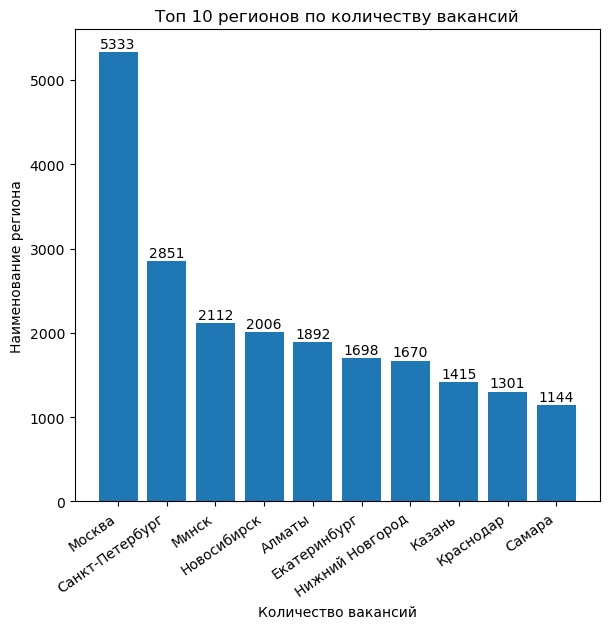

In [75]:
top_10_cities = '''
SELECT
    COUNT(v.id) AS cnt,
    a.name AS area
FROM vacancies v
JOIN areas a ON v.area_id=a.id
GROUP BY a.name
ORDER BY cnt DESC
LIMIT 10
'''

df = pd.read_sql_query(top_10_cities, connection)

import matplotlib.pyplot as plt
# создадим фигуру и отрисуем график 
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(x=df.area.values, height=df.cnt.values)

# Добавим подписи данных
for at_x, at_y in enumerate(df.cnt):
    ax.text(at_x, at_y + 50, round(at_y, 1), horizontalalignment='center')

# Повернём подписи столбцов на оси х
plt.xticks(rotation=35, horizontalalignment='right')
plt.tight_layout()

# добавим подписи осей и графика
ax.set(xlabel='Количество вакансий', 
       ylabel='Наименование региона', 
       title='Топ 10 регионов по количеству вакансий',
       );


# выведем на экран результат
fig.show()

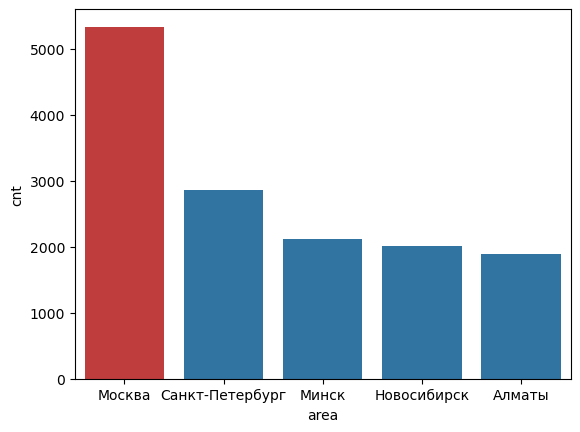

In [76]:
query_4_1 = f'''
SELECT a.name area, COUNT(v.area_id) cnt
FROM vacancies v JOIN areas a ON v.area_id = a.id
GROUP BY a.id, a.name
ORDER BY 2 DESC
LIMIT 5
'''
df = pd.read_sql_query(query_4_1, connection)

filtred_color = [('tab:red' if x > 3000 else 'tab:blue') for x in df.cnt]
sns.barplot(df, x='area', y='cnt', palette=filtred_color);

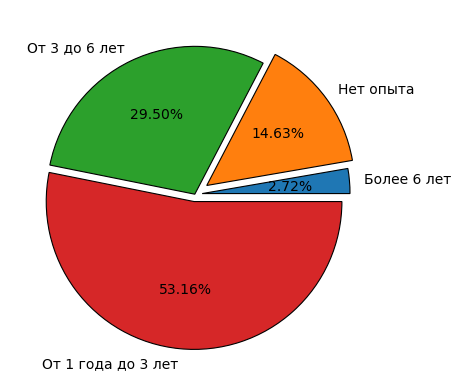

In [77]:
query_4_5 = f'''
SELECT experience, COUNT(id)
FROM vacancies
GROUP BY 1
ORDER BY 2
'''
df = pd.read_sql_query(query_4_5, connection)

plt.pie(
    df['count'],
    labels = df['experience'].values,
    autopct = '%.2f%%',
    explode = (0.05, 0.1, 0, 0.05),
    wedgeprops = {'lw':0.8,'edgecolor':'k'},   
);

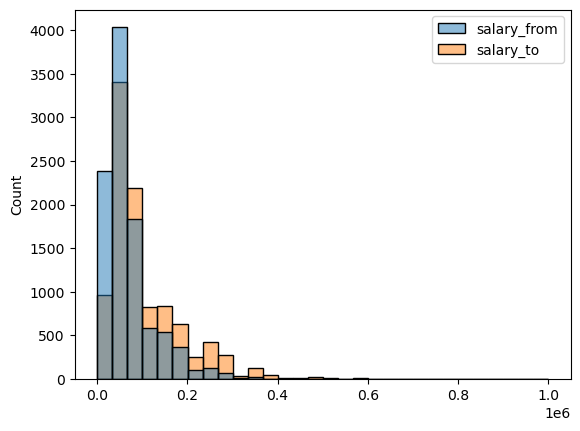

In [78]:
query_4_3 = f'''
SELECT salary_from as salary_from, salary_to as salary_to
FROM vacancies
'''
df = pd.read_sql_query(query_4_3, connection)
df.dropna(inplace=True)
sns.histplot(data=df, bins=30);

In [79]:
connection.close()